<a href="https://colab.research.google.com/github/nirbarash88/node-js-exprees-server-react-client/blob/master/Part_A_of_Final_Project_of_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


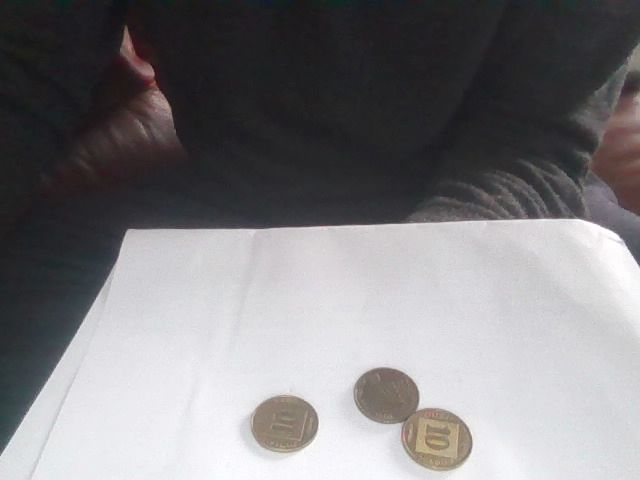

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Number of coins detected: 3


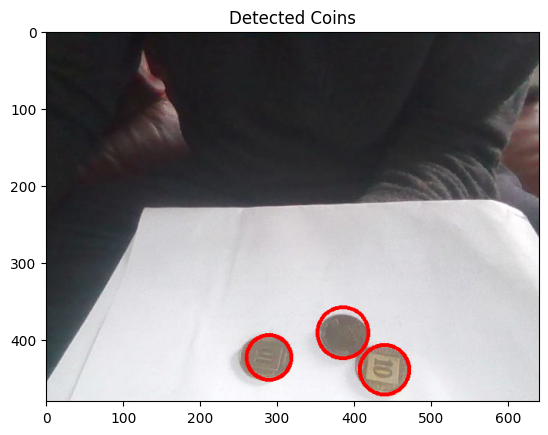

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_and_count_coins(image_path):
    # Load the input image
    input_image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur for smoothing
    smoothed_image = cv2.GaussianBlur(grayscale_image, (11, 11), 0)

    # Perform edge detection using Canny
    edges = cv2.Canny(smoothed_image, 30, 150)

    # Detect circles (coins) using HoughCircles with more flexible parameters
    detected_circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=30, param2=35, minRadius=10, maxRadius=100)
    # Check if any circles are detected
    if detected_circles is not None:
        detected_circles = np.round(detected_circles[0, :]).astype("int")

        # Count the number of detected coins
        num_coins = len(detected_circles)
        print(f"Number of coins detected: {num_coins}")

        # Draw circles on the original image in red to highlight detected coins
        for (x, y, r) in detected_circles:
            cv2.circle(input_image, (x, y), r, (0, 0, 255), 4)  # Red color (BGR)

        # Display the image with detected coins
        plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
        plt.title('Detected Coins')
        plt.show()
    else:
        print("No coins detected")

detect_and_count_coins(filename)